Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Model saved to drought_prediction_model.pkl
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.99      0.99      0.99       523
           2       0.90      0.88      0.89        59
           3       0.91      0.77      0.83        13
           4       0.83      0.83      0.83         6
           5       0.50      1.00      0.67         1
           7       1.00      1.00      1.00        12

    accuracy                           0.97       622
   macro avg       0.88      0.92      0.89       622
weighted avg       0.97      0.97      0.97       622

Accuracy: 0.9742765273311897


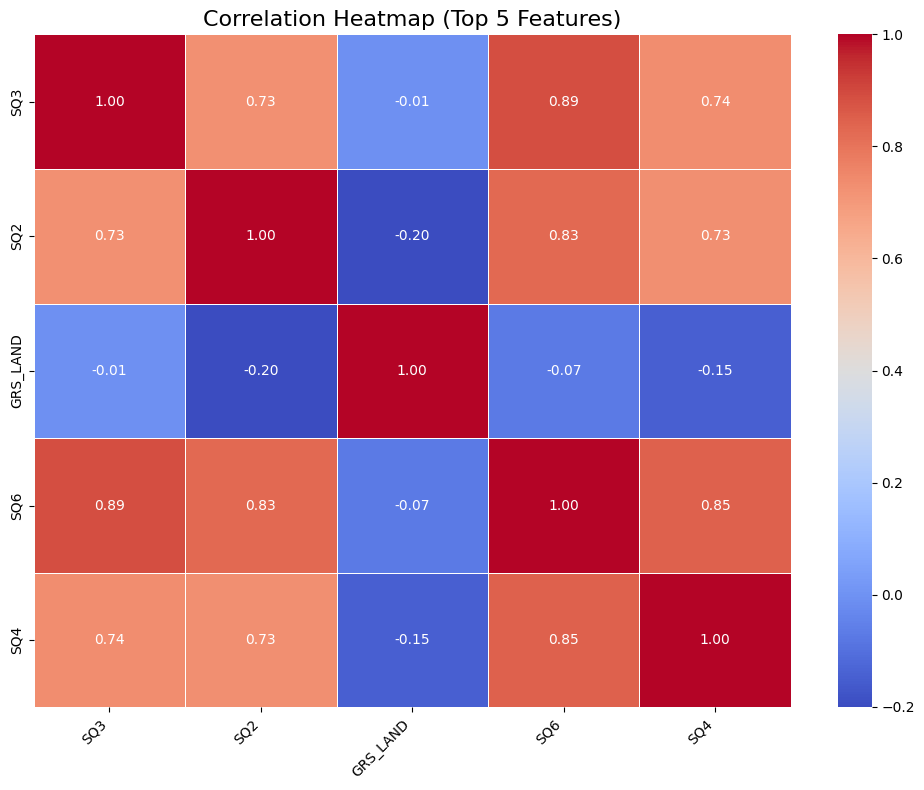

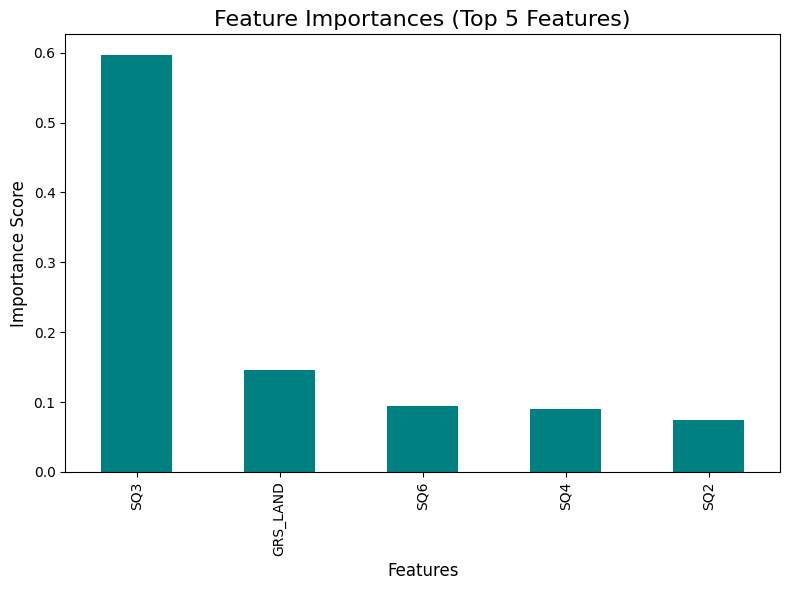

<ipython-input-11-9c2a8b7b89ed>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="pastel")


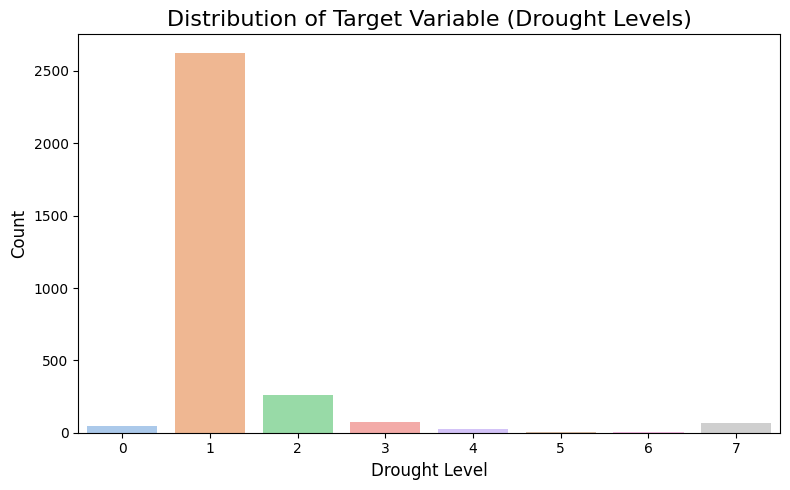

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the dataset
file_path = "/content/soil_data.csv"  # Replace with the correct path to your dataset
data = pd.read_csv(file_path)

# Data Preprocessing
# Handle missing values by replacing them with the column mean
data.fillna(data.mean(), inplace=True)

# Select the top 5 features and the target variable
top_5_features = ['SQ3', 'SQ2', 'GRS_LAND', 'SQ6', 'SQ4']
X = data[top_5_features]  # Use only the top 5 features
y = data.iloc[:, -1]  # Assuming the last column is the target (e.g., Drought_Level)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Evaluate the best model
best_rf_model = grid_rf.best_estimator_
rf_preds = best_rf_model.predict(X_test)

# Save the final model
model_path = "drought_prediction_model.pkl"
joblib.dump(best_rf_model, model_path)
print(f"Model saved to {model_path}")

# Performance Metrics
print("Classification Report:")
print(classification_report(y_test, rf_preds))
print(f"Accuracy: {accuracy_score(y_test, rf_preds)}")

# Visualization 1: Correlation Heatmap (for top 5 features only)
plt.figure(figsize=(10, 8))
correlation_matrix = data[top_5_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            linewidths=0.5, annot_kws={"size": 10})
plt.title("Correlation Heatmap (Top 5 Features)", fontsize=16)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Visualization 2: Feature Importance from Random Forest
feature_importances = pd.Series(best_rf_model.feature_importances_, index=top_5_features)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(8, 6))
feature_importances.plot(kind='bar', color='teal')
plt.title("Feature Importances (Top 5 Features)", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Visualization 3: Target Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette="pastel")
plt.title("Distribution of Target Variable (Drought Levels)", fontsize=16)
plt.xlabel("Drought Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [8]:
data.head()

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,...,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,...,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,...,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,...,1.891909,0.027488,1.919397,3,2,1,1,1,1,1


In [6]:
print(X.columns)

Index(['fips', 'lat', 'lon', 'elevation', 'slope1', 'slope2', 'slope3',
       'slope4', 'slope5', 'slope6', 'slope7', 'slope8', 'aspectN', 'aspectE',
       'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND', 'NVG_LAND',
       'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND', 'CULTIR_LAND',
       'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6'],
      dtype='object')


In [12]:
print(data.iloc[:, -1].value_counts())


SQ7
1    2622
2     261
3      73
7      69
0      49
4      29
6       3
5       3
Name: count, dtype: int64
